Performing exploratory data analysis on the netflix_data.csv data to understand more about movies from the 1990s decade.

In [7]:
#importing pandas and matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [40]:
#Reading the netflix_data.csv as a Dataframe

df = pd.read_csv('netflix_data.csv')

In [42]:
df.shape

(4812, 11)

In [44]:
#Viewing the first 5 rows of the table
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [46]:
#Having an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


The dataframe has 11 columns, there are no null values and the target columns are in the right data format

In [48]:
#Checking for duplicate values/entries
df.duplicated().sum()

0

The dataframe has no duplicate values

Subsetting the data

In [54]:
#Subsetting the dataframe to isolate movies released in the 1990s
subset = df["release_year"].between(1990,1999)
df = df[subset]
df["release_year"].value_counts()

release_year
1997    26
1998    26
1999    26
1993    16
1995    16
1992    16
1996    15
1990    15
1991    14
1994    14
Name: count, dtype: int64

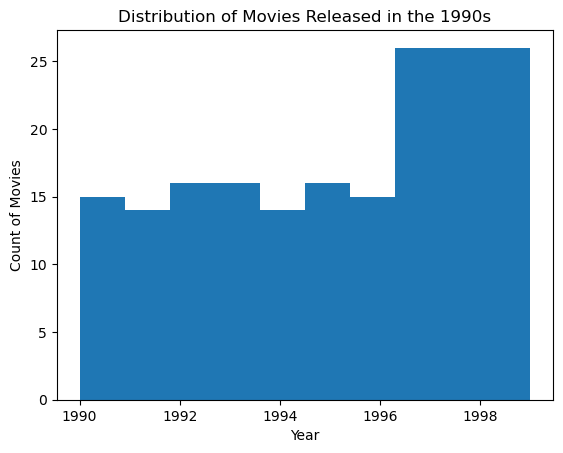

In [58]:
#Creating an histogram to visualize the count of movies released in the 1990s
plt.hist(df["release_year"])
plt.xlabel("Year")
plt.ylabel("Count of Movies")
plt.title("Distribution of Movies Released in the 1990s")
plt.show();

Netflix featured a higher proportion of movies premiered in the late 1990s than those released in the early and mid 1990s

Question 1:

What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration.

In [69]:
df["duration"].value_counts()

duration
94     7
101    6
95     5
93     5
108    5
      ..
97     1
185    1
109    1
79     1
191    1
Name: count, Length: 92, dtype: int64

In [78]:
#Using the "mode" in built statistics function to deduce the most frequent movies
duration = df["duration"].mode().sum()
duration

94

The most frequent movie duration in the 1990s is 94 minutes

In [84]:
#Confirming the datatype of the variable name "duration"
duration.dtype

dtype('int64')

Question 2:

A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s
and save this integer as short_movie_count

In [87]:
#Checking out the different genresof movies released in 1990s
df["genre"].value_counts()

genre
Action            48
Dramas            44
Comedies          40
Children          15
Classic Movies    15
Stand-Up           8
Thrillers          5
Horror Movies      4
Documentaries      2
Cult Movies        2
Docuseries         1
Name: count, dtype: int64

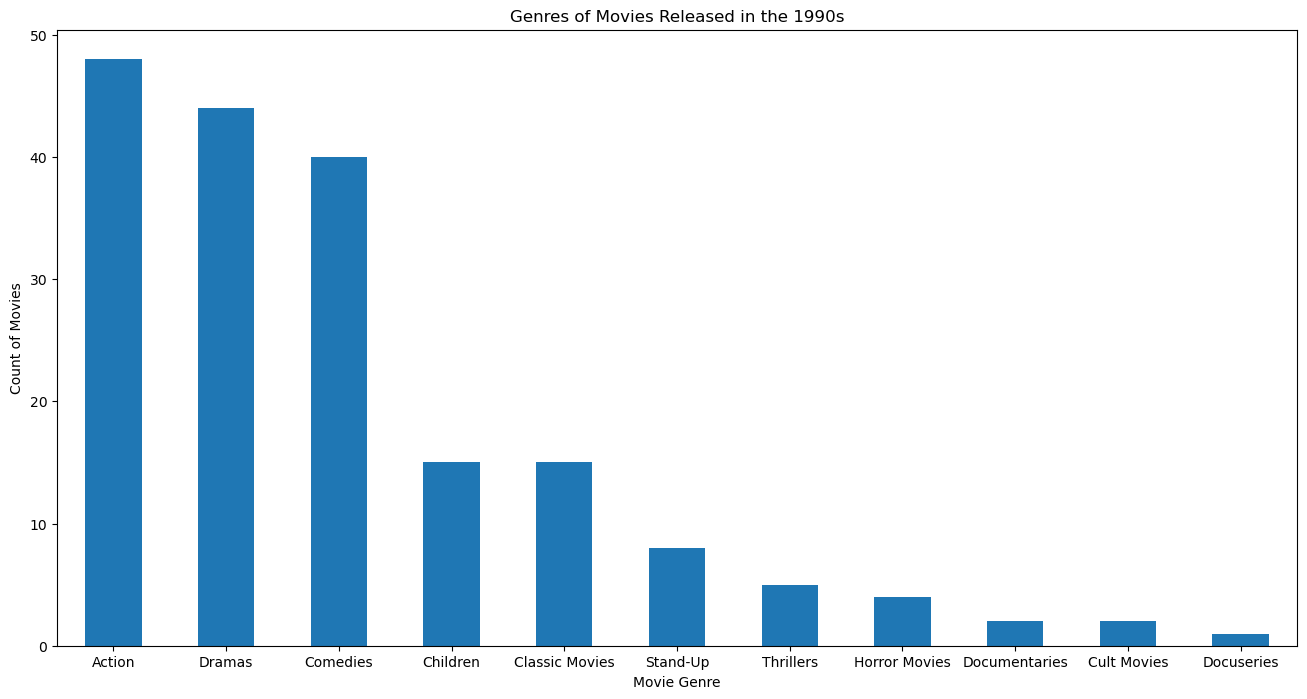

In [95]:
#Creating a bar plot to visualize the genres of movies released in the 19990s
df["genre"].value_counts().plot(kind="bar", figsize=(16,8), rot=0)
plt.xlabel("Movie Genre")
plt.ylabel("Count of Movies")
plt.title("Genres of Movies Released in the 1990s");

Subsetting the short action movies with duration less than 90 minutes

In [102]:
short_action_movies = (df["genre"] == "Action") & (df["duration"] < 90)
short_action_movies

6       False
118     False
145     False
167     False
194     False
        ...  
4672    False
4689    False
4718    False
4746    False
4756    False
Length: 184, dtype: bool

In [108]:
#Obtaining the total count of movies with short duration
short_movie_count = short_action_movies.sum()
short_movie_count

7

On Netflix, there are only 7 short Action movies that were premiered in the 1990s